In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
df = pd.read_csv("6assign1.csv")

In [5]:
df = df.rename(columns={"1": "romantic", "2": "action", "3": "drama","4":"comedy","5":"scifi"})

## Goal
Determine if there are significant differences between the 5 categories
## Null Hypothesis (H₀): 
The IMDb scores for all categories are equal, i.e., no significant difference exists between the mean scores of the five categories.
H0: μromantic=μaction=μdrama=μcomedy=μsci-fi

## Alternative Hypothesis (H₁): 
At least one category has a mean IMDb score that is significantly different from the others.
H1: At least one μ is different from the rest.

## Chosen test: One-way ANOVA
This test was chosen since we are testing whether there are any statistically significant differences between the means of  5 groups.

### But first!! Assumptions need to be verified: 
- The samples are independent. (we can assume is true)
- The data in each category are approximately normally distributed.
- The variances among groups are equal (homogeneity of variance).

In [12]:
# 1. Test Normality (Shapiro-Wilk test for each category)
for category in df.columns:
    stat, p = stats.shapiro(df[category])
    #print(f"Shapiro-Wilk test for {category}: stat={stat:.4f}, p={p:.4f}")
    if p > 0.05:
        print(f"{category} follows a normal distribution (p > 0.05)")
    else:
        print(f"{category} does not follow a normal distribution (p <= 0.05)")

romantic follows a normal distribution (p > 0.05)
action follows a normal distribution (p > 0.05)
drama follows a normal distribution (p > 0.05)
comedy follows a normal distribution (p > 0.05)
scifi follows a normal distribution (p > 0.05)


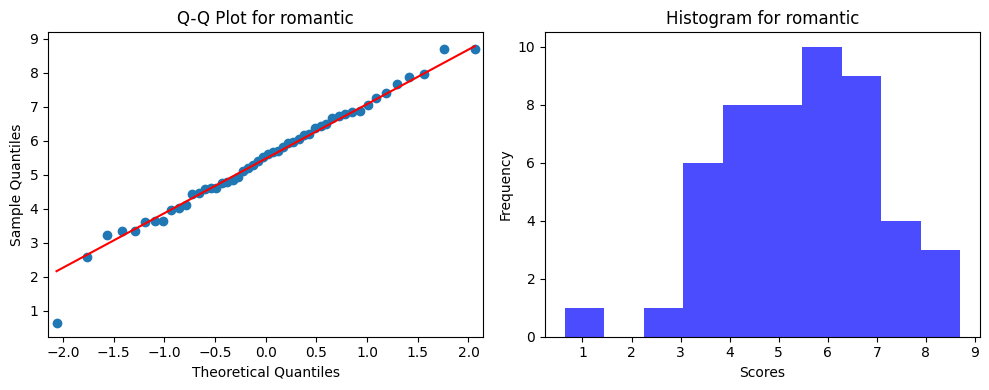

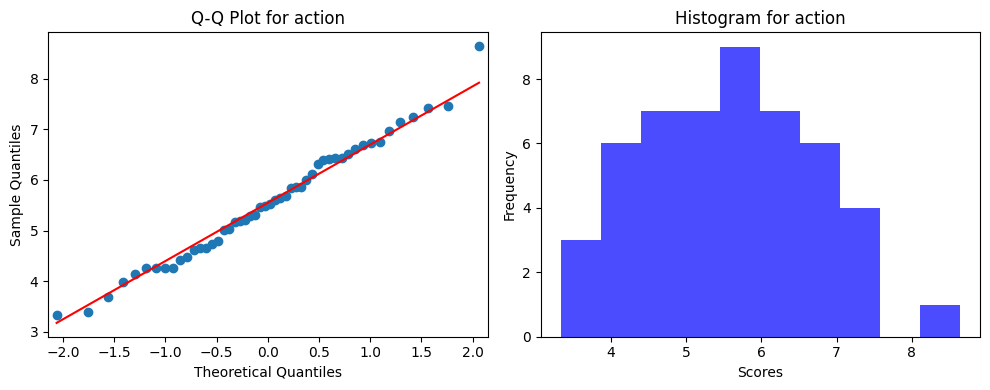

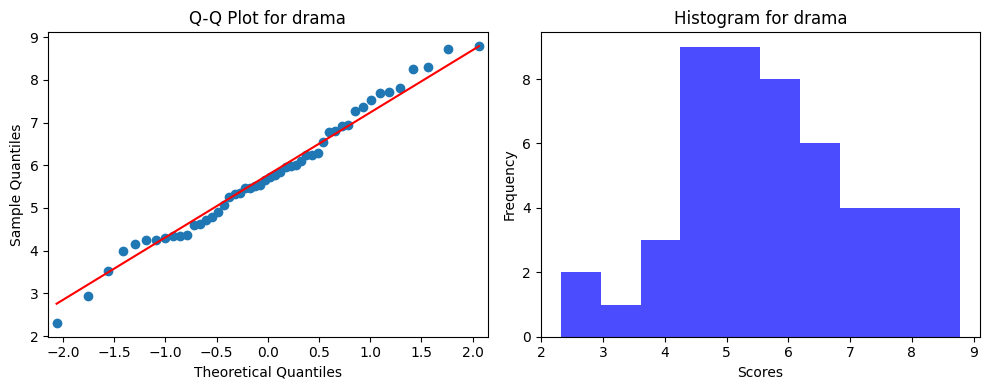

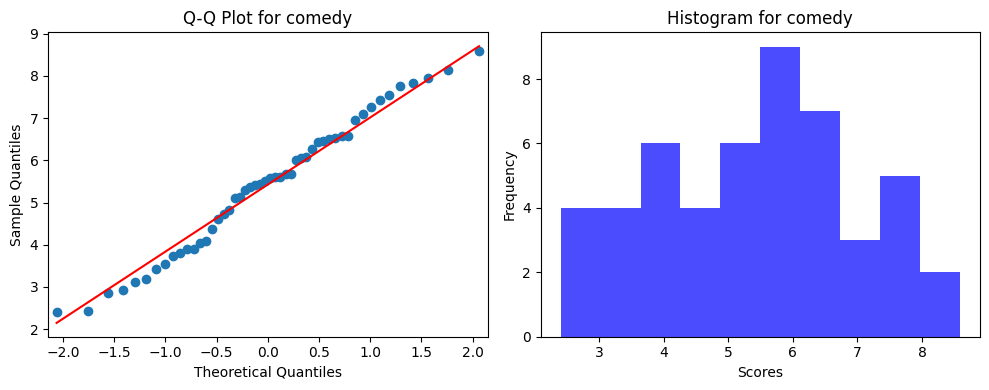

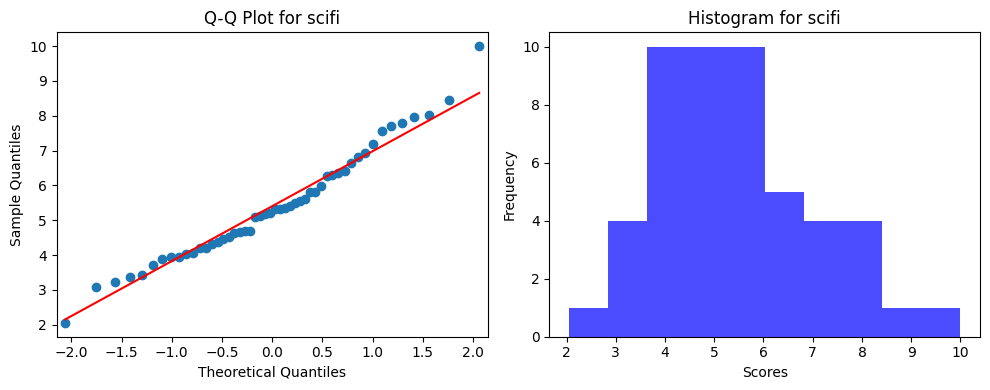

In [15]:
# 2. Visualize Normality (Q-Q Plots and Histograms)
for category in df.columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    qqplot(df[category], line='s', ax=plt.gca())
    plt.title(f"Q-Q Plot for {category}")
    
    plt.subplot(1, 2, 2)
    plt.hist(df[category], bins=10, alpha=0.7, color='blue')
    plt.title(f"Histogram for {category}")
    plt.xlabel("Scores")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [17]:
# 3. Test Homogeneity of Variances (Levene’s test)
stat, p = stats.levene(df['romantic'], df['action'], df['drama'], df['comedy'], df['scifi'])
print(f"Levene’s test: stat={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("Variance is equal across groups (p > 0.05)")
else:
    print("Variance is not equal across groups (p <= 0.05)")

Levene’s test: stat=1.2871, p=0.2756
Variance is equal across groups (p > 0.05)


In [19]:
# Extract scores for each category
romantic_scores = df['romantic']
action_scores = df['action']
drama_scores = df['drama']
comedy_scores = df['comedy']
scifi_scores = df['scifi']

# Perform ANOVA
stat, p = f_oneway(romantic_scores, action_scores, drama_scores, comedy_scores, scifi_scores)
print(f"ANOVA results: F-statistic={stat:.4f}, p-value={p:.4f}")

# Interpret the result
if p < 0.05:
    print("There is a significant difference in IMDb scores between the categories (p < 0.05).")
else:
    print("There is no significant difference in IMDb scores between the categories (p >= 0.05).")

ANOVA results: F-statistic=0.4971, p-value=0.7379
There is no significant difference in IMDb scores between the categories (p >= 0.05).


## Interpretation: 
No significant difference is found between the categories after runnin the one way Anova test.
Still I will carry on with the post-hoc pairwise test just for the sake of the example.

## Post-hoc test: HSD test
**Tukey's Honest Significant Difference (HSD) test** is a post-hoc analysis performed after an ANOVA to identify pairwise differences between group means. Tukey's test is particularly useful when comparing multiple groups, as it adjusts for the increased likelihood of errors due to multiple comparisons.

In [23]:
# Prepare the data for Tukey's HSD test
categories = ['romantic'] * len(romantic_scores) + ['action'] * len(action_scores) + \
             ['drama'] * len(drama_scores) + ['comedy'] * len(comedy_scores) + ['scifi'] * len(scifi_scores)
scores = np.concatenate([romantic_scores, action_scores, drama_scores, comedy_scores, scifi_scores])

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(endog=scores, groups=categories, alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
  action   comedy  -0.1214 0.9944 -0.9468  0.704  False
  action    drama   0.2246 0.9449 -0.6008   1.05  False
  action romantic  -0.0804 0.9989 -0.9058  0.745  False
  action    scifi   -0.145 0.9889 -0.9704 0.6804  False
  comedy    drama    0.346 0.7785 -0.4794 1.1714  False
  comedy romantic    0.041 0.9999 -0.7844 0.8664  False
  comedy    scifi  -0.0236    1.0  -0.849 0.8018  False
   drama romantic   -0.305 0.8481 -1.1304 0.5204  False
   drama    scifi  -0.3696 0.7335  -1.195 0.4558  False
romantic    scifi  -0.0646 0.9995   -0.89 0.7608  False
-------------------------------------------------------


## Interpretation: 
The p-adj (adjusted p-value) values for all pairwise comparisons are greater than 0.05, and the reject column is False for all pairs. This indicates that there are no statistically significant differences between any of the categories.